# 1. Importando base de dados e bibliotecas necessárias

In [97]:
import pandas as pd
import random 
import numpy as np
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
data = pd.read_csv("csv_result-ebay_confianca_completo.csv")

"Feedbacks",
   "Avaliações",
    "Lista Negra",
    "Extroversão M",
    "Extroversão C",
    "Extroversão S",
    "Neuroticismo M",
    "Neuroticismo C",
    "Neuroticismo S",
    "Conscienciosidade M",
    "Conscienciosidade C",
    "Conscienciosidade S",
    "Amabilidade M",
    "Amabilidade C",
    "Amabilidade S",
    "Abertura M",
    "Abertura C",
    "Abertura S",
    "Amabilidade Indico",
    "Conscienciosidade Indico",
    "Extroversão Indico",
    "Abertura Indico",
    "Abertura Watson",
    "Conscienciosidade Watson",
    "Extroversão Watson",
    "Amabilidade Watson",
    "Neuroticismo Watson",
    "Aventura",
    "Artístico",
    "Emocionalidade",
    "Imaginação",
    "Intelecto",
    "Liberalismo",
    "Realização",
    "Cautela",
    "Dever",
    "Ordem",
    "Disciplina",
    "Eficácia",
    "Atividade",
    "Assertividade",
    "Alegria",
    "Excitação",
    "Amizade",
    "Sociabilidade",
    "Altruísmo",
    "Cooperação",
    "Modéstia",
    "Moralidade",
    "Simpatia",
    "Confiança",
    "Raiva",
    "Ansiedade",
    "Depressão",
    "Imoderação",
    "Autoconsciência",
    "Vulnerabilidade",
    "Necessidade de Desafio",
    "Necessidade de Proximidade",
    "Necessidade de Curiosidade",
    "Necessidade de Excitação",
    "Necessidade de Harmonia",
    "Necessidade de Ideal",
    "Necessidade de Liberdade",
    "Necessidade de Amor",
    "Necessidade de Praticidade",
    "Necessidade de Autoexpressão"
    "Necessidade de Estabilidade",
    "Necessidade de Estrutura",
    "Valor Conservação",
    "Valor Abertura",
    "Valor Hedonismo",
    "Valor Autoaperfeiçoamento",
    "Valor Autotranscendência",
    "Reputação"

São as variáveis estudads dentro desse dataset, vamos aplicar um modelo de aprendizado de máquina denominado Random Forest para avaliar a reputação, se será boa ou ruim, em outras palavras o modelo aplicado será de classificação.

In [99]:
data.isnull().sum() # Não tem dados faltantes

feedbacks                  0
reviews                    0
blacklist                  0
mextraversion              0
cextraversion              0
                          ..
value_openess              0
value_hedonism             0
value_selfenhancement      0
value_selftranscendence    0
reputation                 0
Length: 75, dtype: int64

In [100]:
data.info() # Informações das colunas e os tipos de dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5806 entries, 2 to 5807
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   feedbacks                5806 non-null   int64  
 1   reviews                  5806 non-null   int64  
 2   blacklist                5806 non-null   object 
 3   mextraversion            5806 non-null   float64
 4   cextraversion            5806 non-null   float64
 5   sextraversion            5806 non-null   int64  
 6   mneuroticism             5806 non-null   float64
 7   cneuroticism             5806 non-null   float64
 8   sneuroticism             5806 non-null   int64  
 9   mconscientiousness       5806 non-null   float64
 10  cconscientiousness       5806 non-null   float64
 11  sconscientiousness       5806 non-null   int64  
 12  magreeableness           5806 non-null   float64
 13  cagreeableness           5806 non-null   float64
 14  sagreeableness          

In [101]:
data['blacklist'] = data['blacklist'] == 'S'

# Definindo aqui o seguinte: Como os modelos de aprendizado de máquina não recebem valores de String como dados, é necessário
# transformar os dados de String em booleans como True or False, nesse caso quem for == 'S' será True, caso contrário é False

In [102]:
data['reputation'] # Coluna a ser avaliada, são ao total 5806 registros

2        Bom
3        Bom
4        Bom
5        Bom
6        Bom
        ... 
5803     Bom
5804    Ruim
5805     Bom
5806    Ruim
5807    Ruim
Name: reputation, Length: 5806, dtype: object

<AxesSubplot:xlabel='reputation', ylabel='count'>

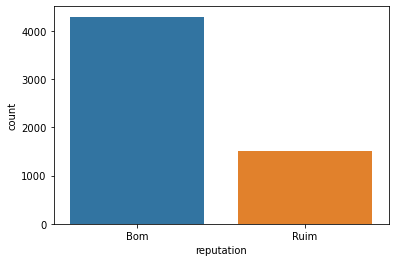

In [103]:
sns.countplot(data['reputation'])

Vamos observar aqui se os dados estão desbalanceados. É notável que a estrutura demonstra um conjunto de dados mais disponíveis para a qualidade 'bom' em comparação a 'ruim'. Dessa forma, o modelo deve ter a separação dos dados de forma estratificada e posteriormente caso necessário utilizar alguns métodos como oversampling ou undersampling.

In [104]:
data['reputation'] = data['reputation'] == 'Bom'

# 2. Importando o modelo de Random Forest para aplicação da Ténica de Machine Learning

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import train_test_split

In [106]:
X = data.drop('reputation', axis=1)
y = data['reputation']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y) 
# Stratify = y significa que a separação das amostras vão ser realizada de forma aleatória, porém, variando de acordo com 
# a proporcionalidade dos dados disponíveis para cada categoria "Bom" ou "Ruim"

In [108]:
X_train.shape, y_train.shape

((4064, 74), (4064,))

In [109]:
X_test.shape, y_test.shape

((1742, 74), (1742,))

In [110]:
clf = RandomForestClassifier() # Importando o modelo de Machine Learning

In [111]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
results = clf.predict(X_test) # Treinando o modelo

In [113]:
# Avaliando o treinamento do modelo antes de aplicar a técnica de under e over (sampling)
accuracy_score(results, y_test)

0.7497129735935706

Observa-se que o modelo obteve uma acurácia de aproximadamente 74.62%, vamos observar como deu-se a parte da matriz de confusão.

In [114]:
cm = confusion_matrix(results, y_test)

In [115]:
cm

array([[  23,    7],
       [ 429, 1283]], dtype=int64)

Text(0.5, 1.0, 'Avaliando o modelo de RandomForest')

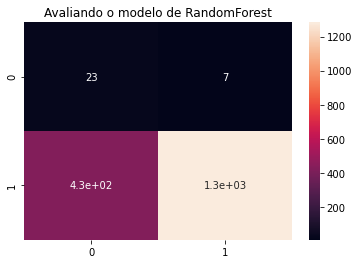

In [116]:
sns.heatmap(cm, annot=True)

plt.title("Avaliando o modelo de RandomForest")

- Vedadeiros positivos: 1281 | Falso Negativo: 433
-     Falso positivo: 9     | Verdadeiro Negativo: 19

In [117]:
# Percentual de acertos para aqueles que tem classificação como "Bom":

((1281)/(1281+433))*100

74.73745624270713

In [118]:
# Percentual de acertos para aqueles que tem classificação como "Ruim":

((19)/(19+9))*100

67.85714285714286

# 3. Vamos usar agora os métodos de undersampling e oversampling

## 3.1. Undersampling

In [119]:
!pip install -U imbalanced-learn

In [122]:
from imblearn.under_sampling import RandomUnderSampler

In [123]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [127]:
X_under, y_under = undersample.fit_resample(X, y)

In [138]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under, test_size=0.3, stratify=y_under)

In [139]:
clf.fit(X_train_u, y_train_u)

RandomForestClassifier()

In [140]:
results_u = clf.predict(X_test_u)

In [141]:
accuracy_score(results_u, y_test_u)

0.5425414364640884

## 3.2. Oversamplig

In [135]:
from imblearn.over_sampling import RandomOverSampler

In [136]:
ros = RandomOverSampler(random_state=0)

X_over, y_over = ros.fit_resample(X, y)

In [142]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size=0.3, stratify=y_over)

In [143]:
clf.fit(X_train_o, y_train_o)

RandomForestClassifier()

In [145]:
results_over = clf.predict(X_test_o)
accuracy_score(results_over, y_test_o)

0.9124031007751938

Nota-se que dos dois métodos somente o de oversampling garantiu um melhor desempenho do modelo de aprendizado de máquina.